# Module 4 Jupyter Project for Initial Data Analysis
Nicole Hansen
01/28/2024

The purpose of this project is to demonstrate guided exploratory
data analysis (EDA) skills with Juptyer

In [39]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [41]:
# Initial data inspection
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


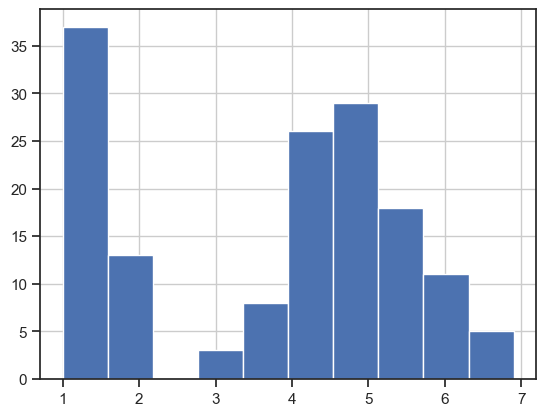

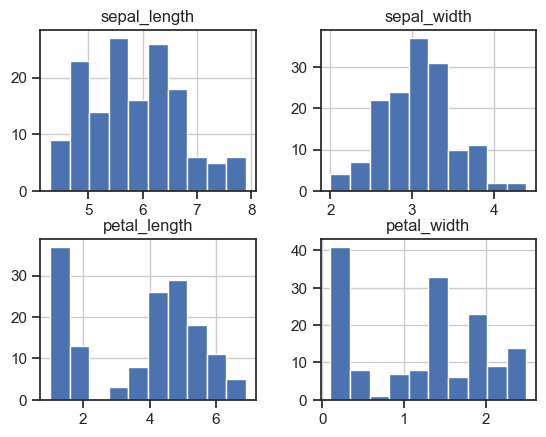

In [42]:
# Initial descriptive statistics
print(df.describe())

# Inspect histogram for petal length
df['petal_length'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

# Observations

Figure 1:
The distribution of petal length shows most petal
lengths are between 1 and 2.  There is also a gap
in petal length from 2.1 to 2.8.  From 2.8 to 6.9, there
is a normal distribution of petal length.

Figure 2:
This figure shows all four plots.  
1) Sepal length is skewed to the left with a few nodes.
2) Sepal width shows a fairly normal distribution.
3) Petal length: see notes in Figure 1
4) Petal width distribution is similar to the petal length distribution




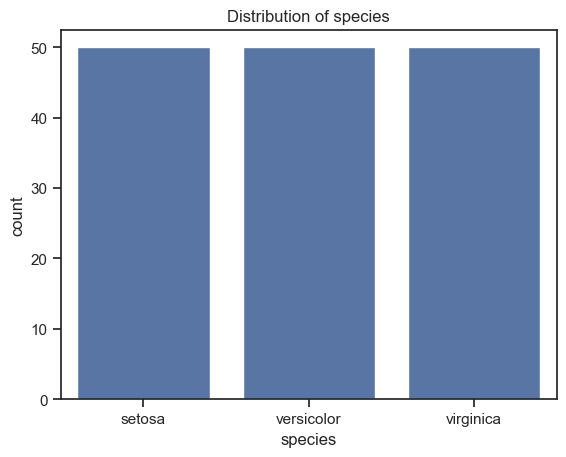

In [43]:
# Inspect value counts by categorical column
df['species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

# Observations

Figure 3:
The number of records for each species is the same: 50


Summary Statistics:
       Sepal Length  Sepal Width  Petal Length  Petal Width  Sepal Area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333   17.822867
std        0.828066     0.435866      1.765298     0.762238    3.361854
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.660000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


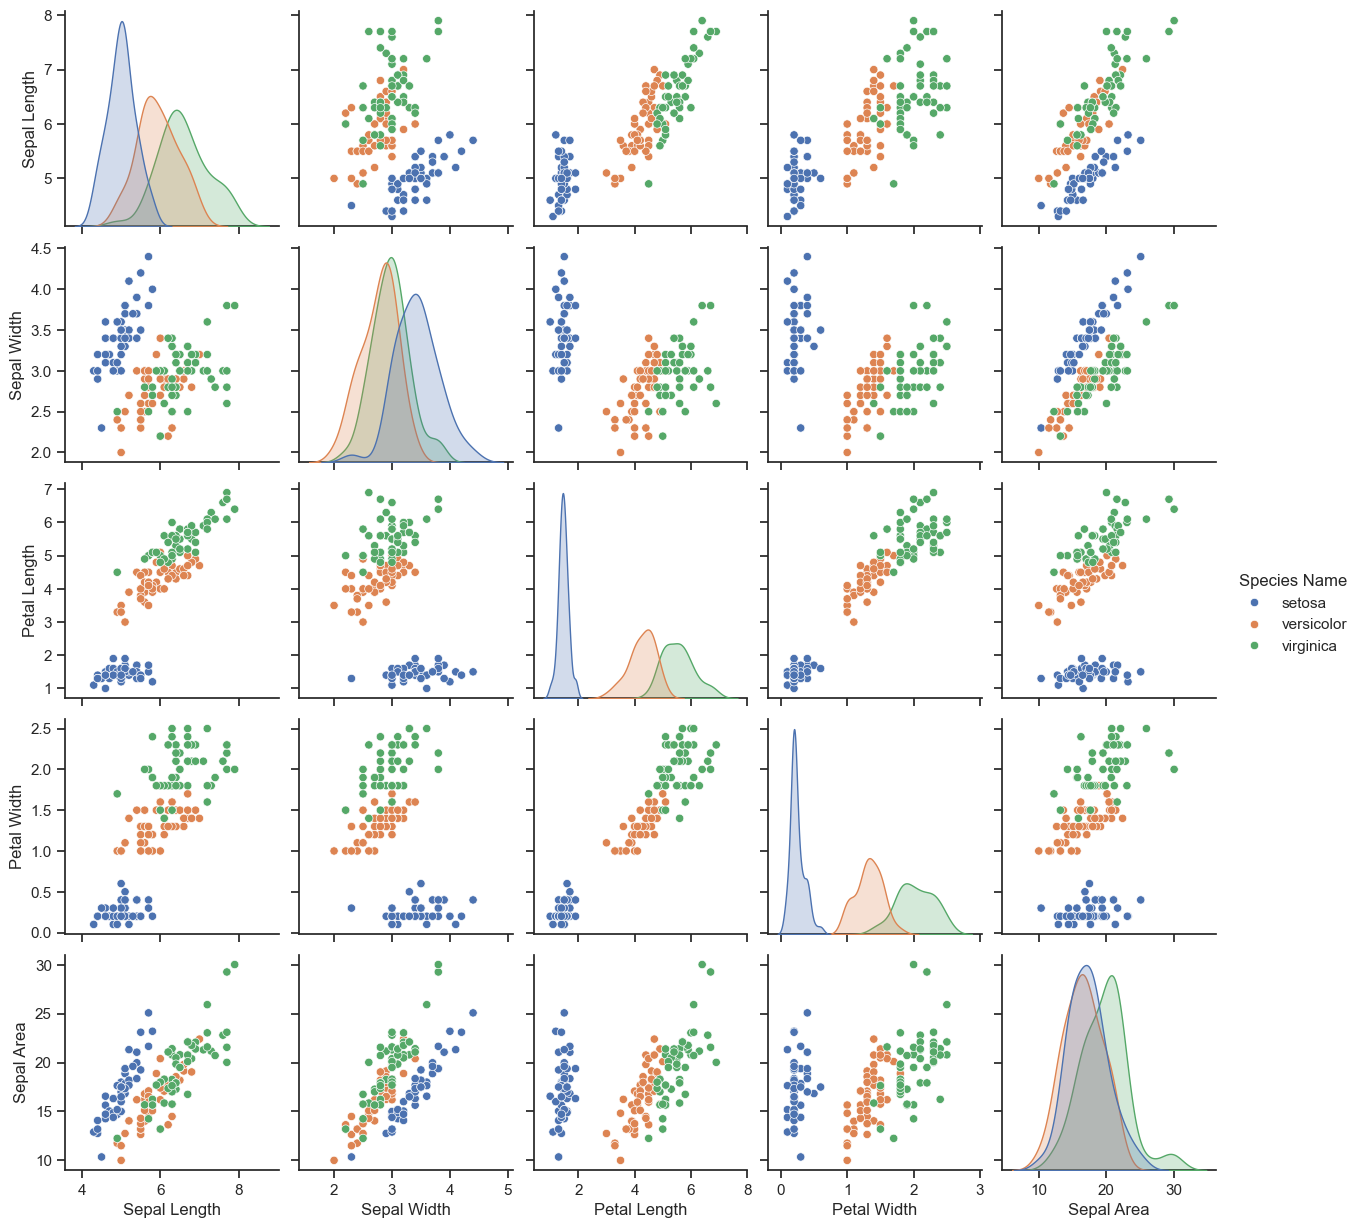

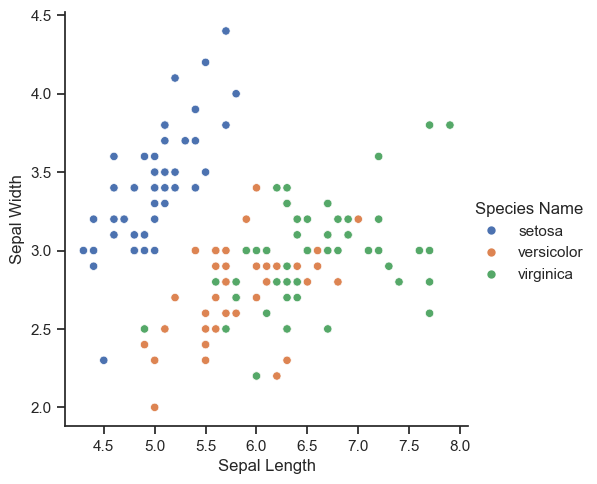

In [44]:
# Data Transformation and Feature Engineering
# Rename columns
df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
df.rename(columns={'sepal_width': 'Sepal Width'}, inplace=True)
df.rename(columns={'petal_length': 'Petal Length'}, inplace=True)
df.rename(columns={'petal_width': 'Petal Width'}, inplace=True)
df.rename(columns={'species': 'Species Name'}, inplace=True)

# Add a new column
df['Sepal Area'] = df['Sepal Length'] * df['Sepal Width']

# Initial visualizations
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

sns.set(style='ticks')
sns.pairplot(df, hue='Species Name')
plt.show()

# Scatterplot 1
sns.relplot(df, x='Sepal Length', y='Sepal Width', hue='Species Name')
plt.show()

# Relationship Between Sepal Length and Sepal Width

There is a strong, linear correlation between sepal width
and sepal length for the setosa species.

The relationship between sepal width and length for versicolor
and virginica is not as strong and contains a few outliers.


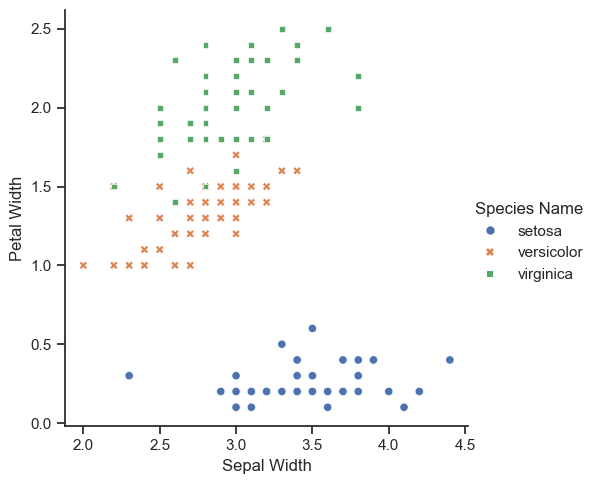

In [45]:
# Scatterplot 2
sns.relplot(df, x='Sepal Width', y='Petal Width', hue='Species Name', style='Species Name')
plt.show()

# Relationship Between Sepal Width and Petal Width

The petal width of setosa is fairly consistent.  The plot
shows that the width of the sepal for setosa is not 
correlated to the width of the petal.

There is a positive, linear correlation between 
sepal width and petal width for the versicolor
and virginica species.


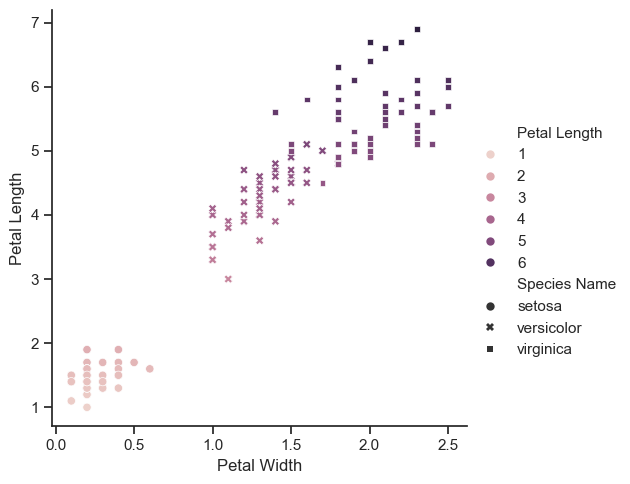

In [46]:
# Scatterplot 3
sns.relplot(df, x='Petal Width', y='Petal Length', hue='Petal Length', style='Species Name')
plt.show()

# Relationship Between Petal Width and Petal Length

This plot shows that the setosa species has the smallest
petal length and petal width of the three species.

The plot also shows that as the petal length increases, 
the petal width increases for both versicolor and virginica.
Additionally, we can see that veriginica has the 
longest and widest petals of the three species.


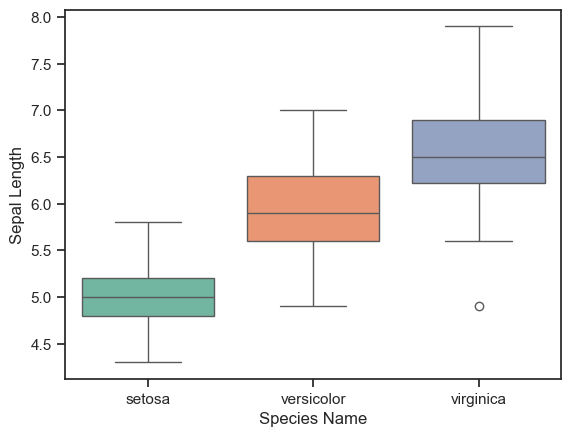

In [47]:
# Box and Whisker Plots
#plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Species Name', y='Sepal Length', hue='Species Name', palette='Set2')
plt.show()

# Box Plot of Sepal Length
Setosa has the smallest distribution for sepal length of the 
three species, with virginica having the largest
distribution, including an outlier.

In general, setosa has the smallest sepal length and 
virginica has the longest sepal length.


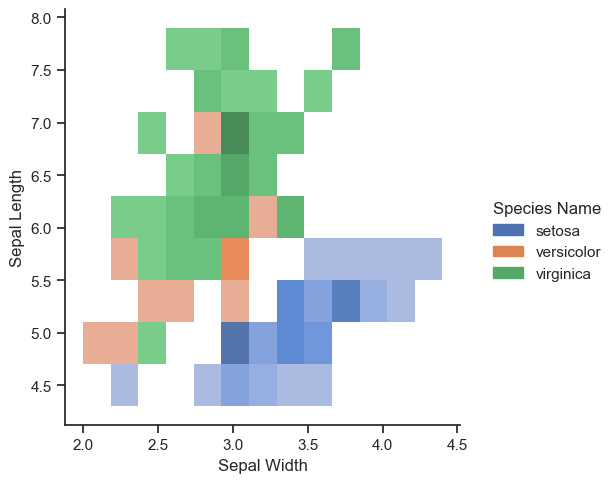

In [48]:
# Bivariate plot
sns.displot(df, x='Sepal Width', y='Sepal Length', hue='Species Name')

The most common sepal width for all three species is 3.  

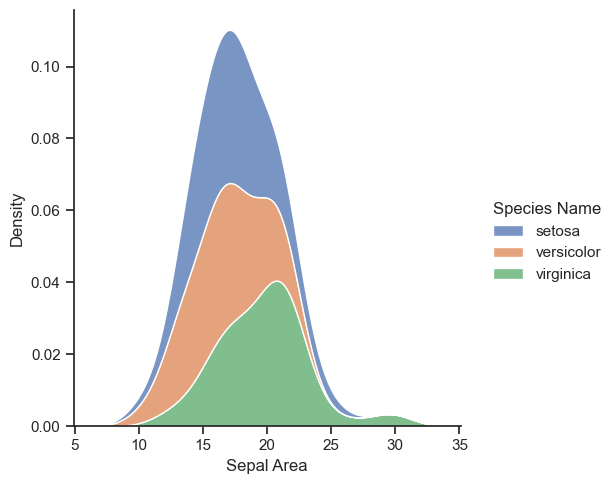

In [49]:
# Density plot 2
sns.displot(df, x='Sepal Area', hue='Species Name', kind='kde', multiple='stack')